In [4]:
from PIL import Image
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

In [5]:
current = !pwd

In [6]:
current

['/home/USER/Desktop/Adversarial3D/Code']

In [8]:
backgrounds = glob.glob(current[0]+'/outputs_submarine/bg/*.jpg') + glob.glob(current[0]+'/outputs_submarine/bg/*.png')
backgrounds

['/home/USER/Desktop/Adversarial3D/Code/outputs_submarine/bg/underwater_1.jpg',
 '/home/USER/Desktop/Adversarial3D/Code/outputs_submarine/bg/underwater_4.jpg',
 '/home/USER/Desktop/Adversarial3D/Code/outputs_submarine/bg/underwater_2.jpg',
 '/home/USER/Desktop/Adversarial3D/Code/outputs_submarine/bg/underwater_3.jpg',
 '/home/USER/Desktop/Adversarial3D/Code/outputs_submarine/bg/underwater_0.jpg']

In [14]:
images = []
textures = ['goldfish','great_shark','grey_whale','killer_whale']
for texture in textures:
    images += glob.glob(current[0]+f'/outputs_submarine/{texture}/submarine/all/*')
images

['/home/USER/Desktop/Adversarial3D/Code/outputs_submarine/goldfish/submarine/all/2.png',
 '/home/USER/Desktop/Adversarial3D/Code/outputs_submarine/goldfish/submarine/all/1.png',
 '/home/USER/Desktop/Adversarial3D/Code/outputs_submarine/goldfish/submarine/all/0.png',
 '/home/USER/Desktop/Adversarial3D/Code/outputs_submarine/goldfish/submarine/all/4.png',
 '/home/USER/Desktop/Adversarial3D/Code/outputs_submarine/goldfish/submarine/all/3.png',
 '/home/USER/Desktop/Adversarial3D/Code/outputs_submarine/great_shark/submarine/all/2.png',
 '/home/USER/Desktop/Adversarial3D/Code/outputs_submarine/great_shark/submarine/all/1.png',
 '/home/USER/Desktop/Adversarial3D/Code/outputs_submarine/great_shark/submarine/all/0.png',
 '/home/USER/Desktop/Adversarial3D/Code/outputs_submarine/great_shark/submarine/all/4.png',
 '/home/USER/Desktop/Adversarial3D/Code/outputs_submarine/great_shark/submarine/all/3.png',
 '/home/USER/Desktop/Adversarial3D/Code/outputs_submarine/grey_whale/submarine/all/2.png',
 '/h

In [15]:
len(backgrounds)

5

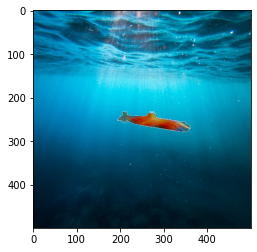

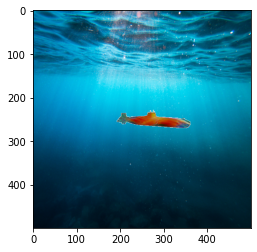

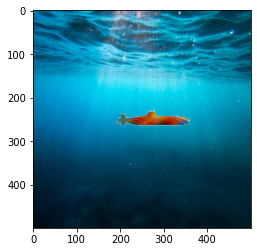

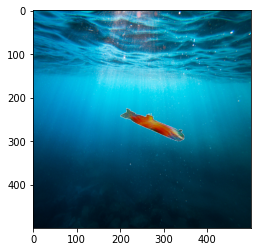

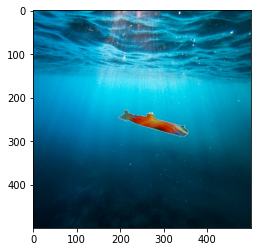

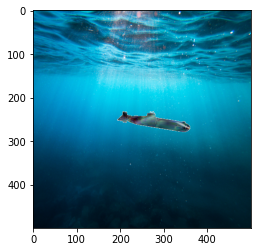

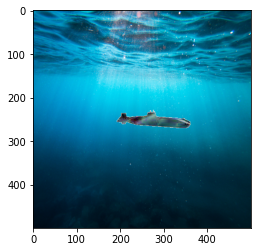

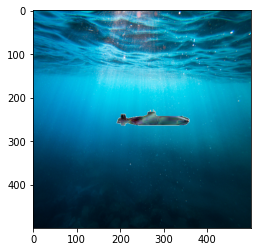

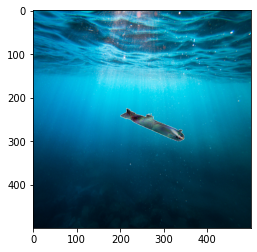

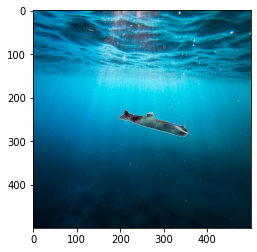

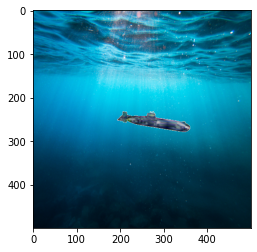

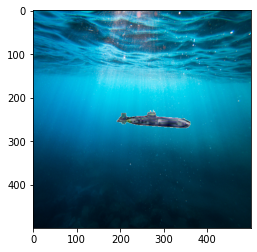

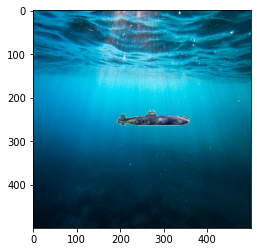

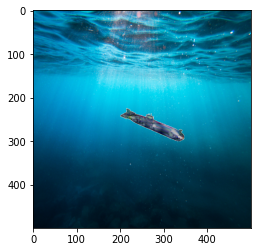

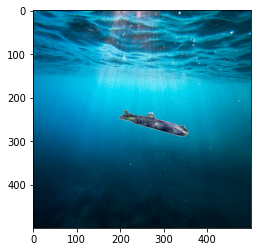

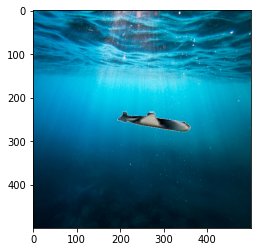

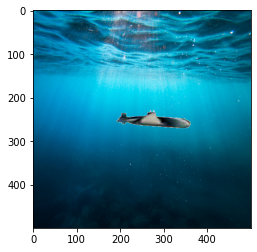

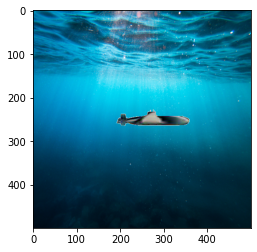

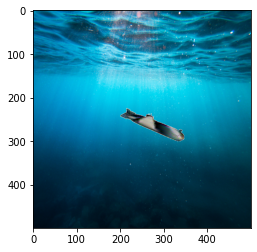

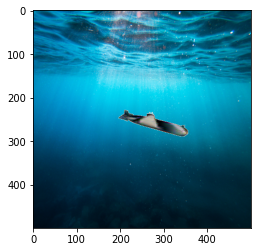

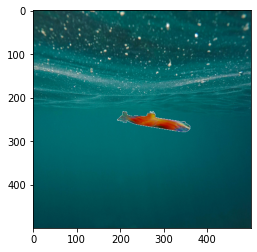

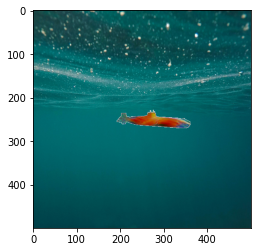

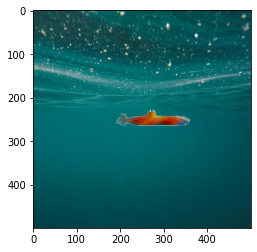

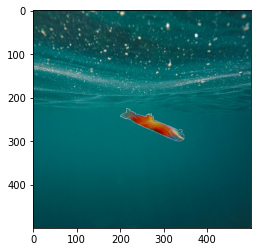

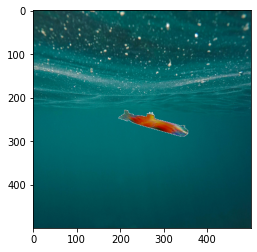

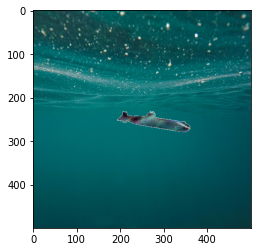

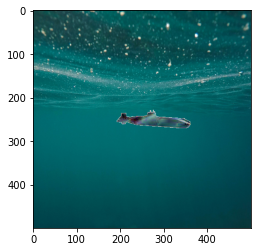

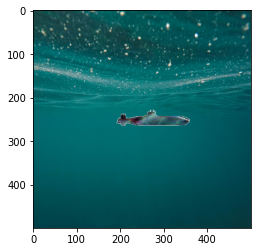

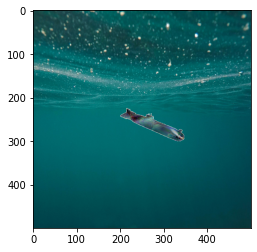

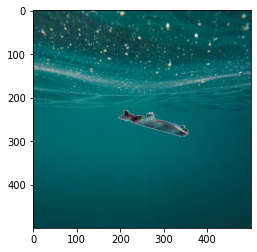

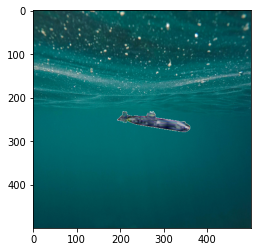

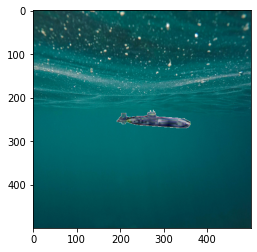

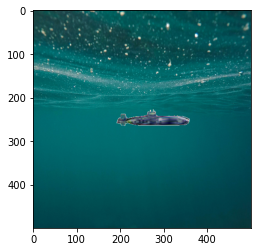

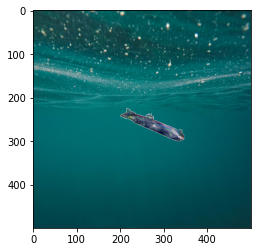

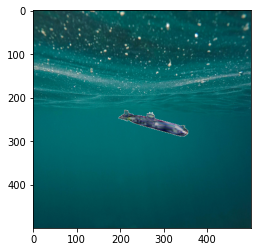

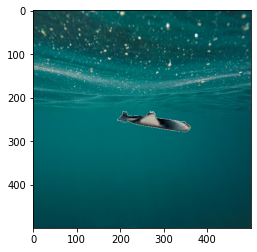

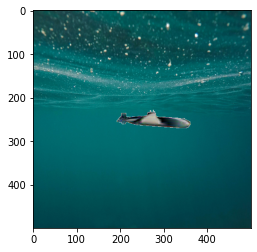

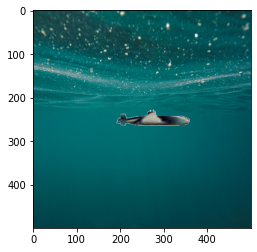

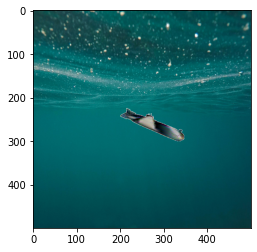

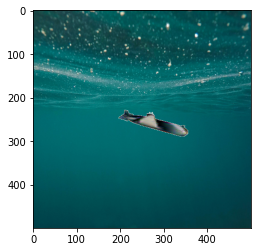

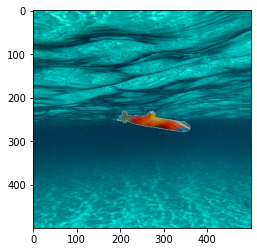

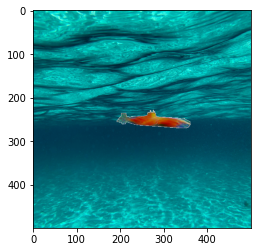

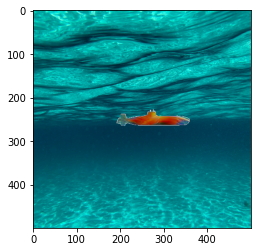

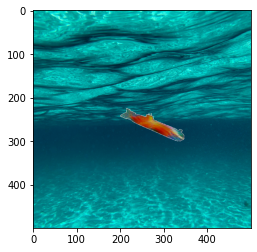

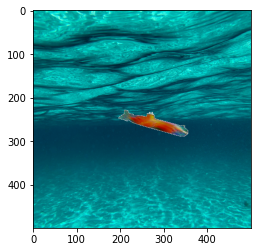

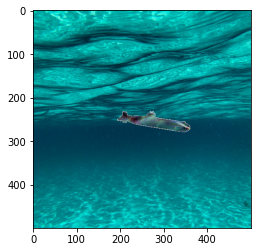

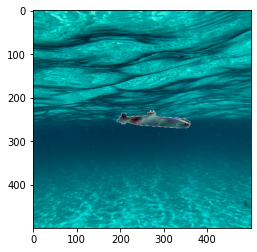

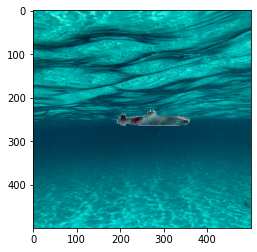

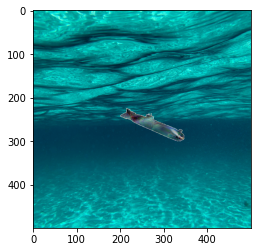

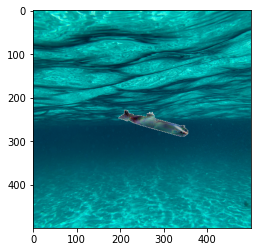

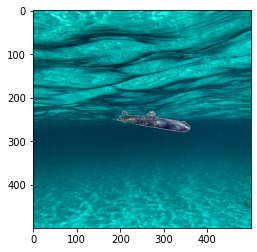

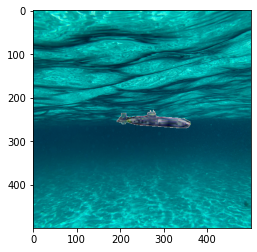

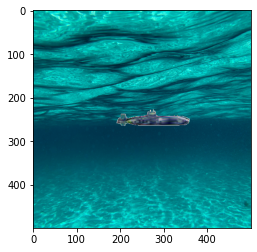

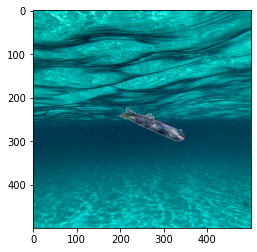

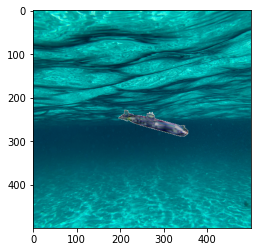

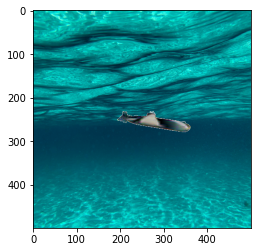

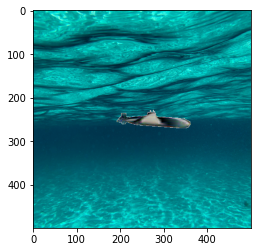

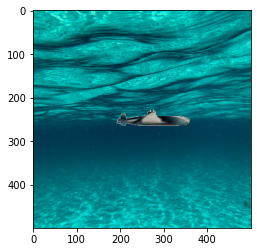

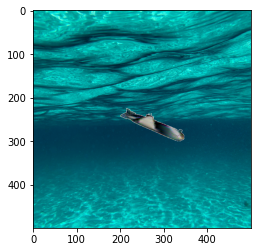

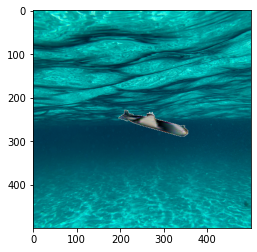

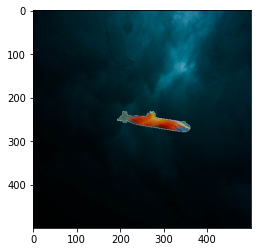

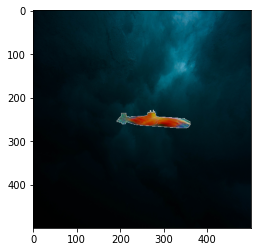

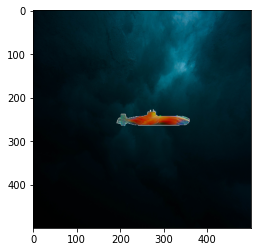

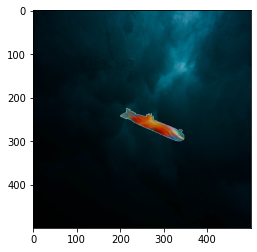

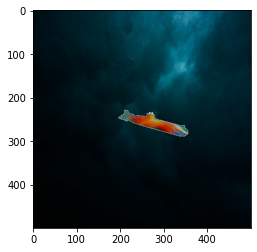

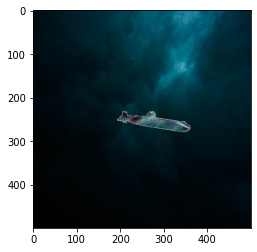

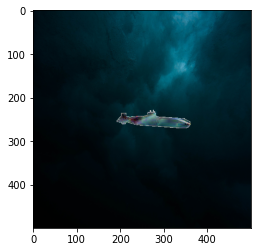

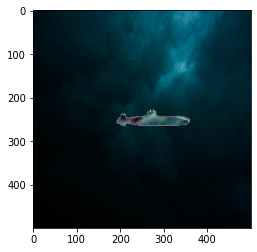

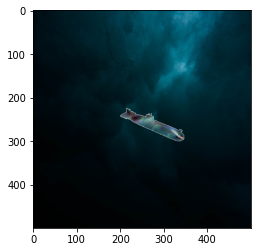

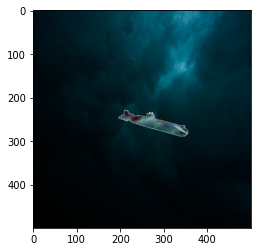

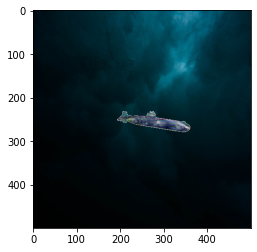

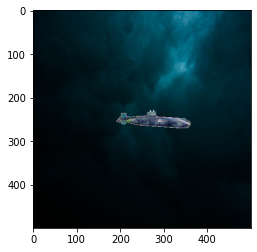

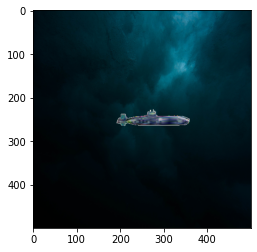

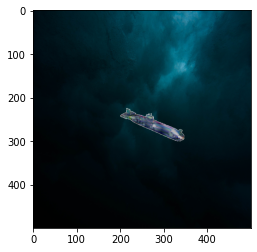

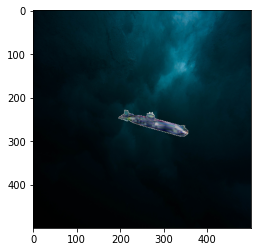

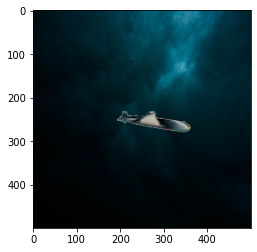

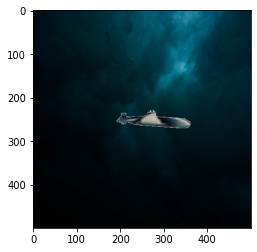

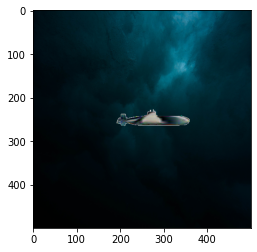

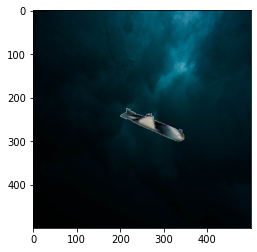

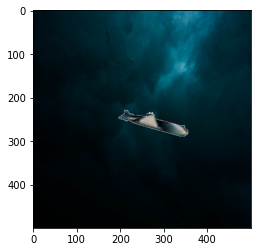

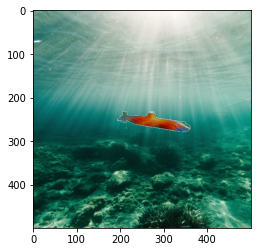

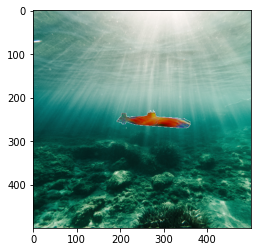

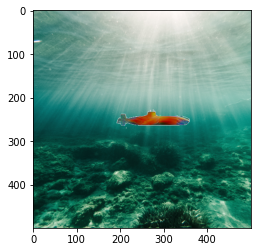

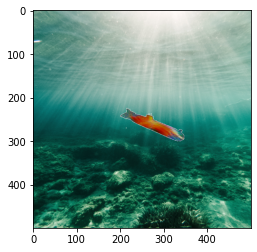

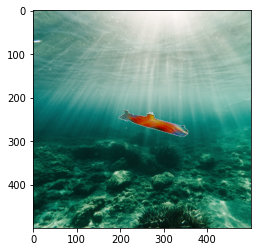

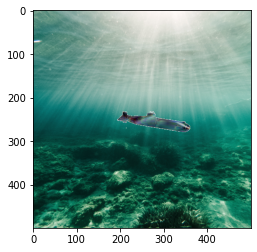

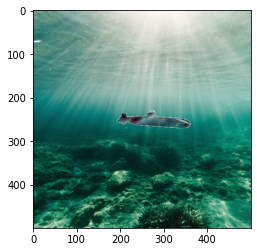

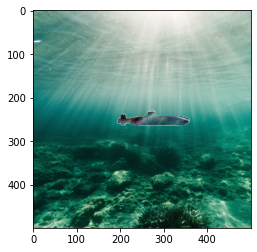

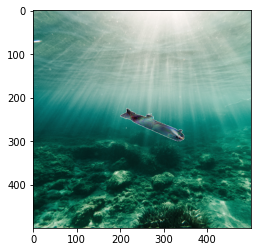

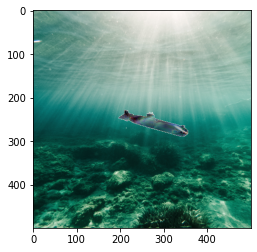

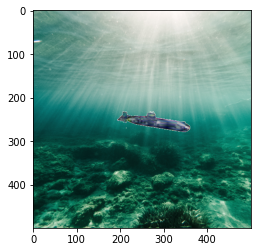

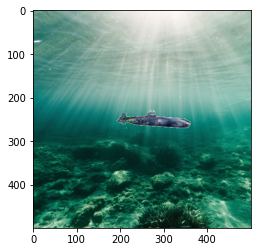

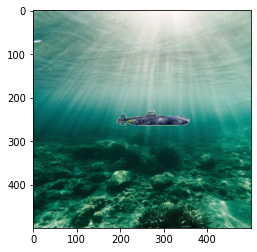

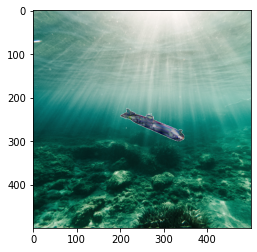

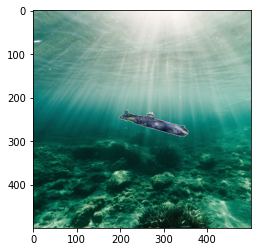

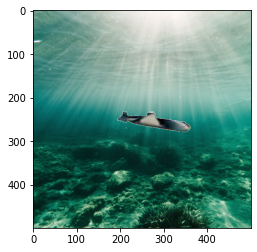

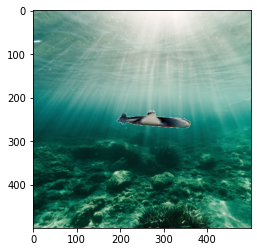

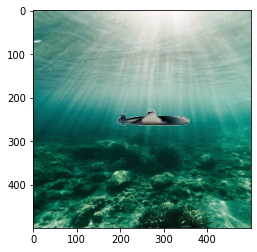

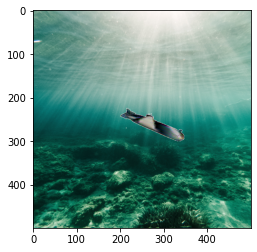

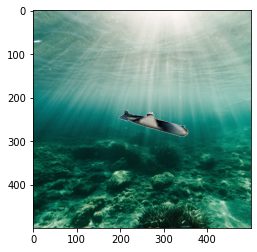

In [19]:
for bg in backgrounds:
    for img in images:
        name  = img.split('/') [-1].split('.')[0]
        label = img.split('/')[7]
        bg_label = bg.split('/')[-1]
        bg0 = np.array(Image.open(bg).resize((500,500)))
        indices = [i for i, s in enumerate(textures) if textures]
        
        img0 = np.array(Image.open(img).resize((500,500)))
        mask = img0[...,:3] == 255
        new = Image.fromarray((mask).astype(np.uint8)) * bg0 + (1-mask)*img0
        im = Image.fromarray(np.uint8(new))
        im.save(f'{current[0]}/outputs_submarine/deceptive_bg/{label}_{name}_{bg_label}')
        plt.imshow(im)
        plt.show()